# Missing Values Imputer

## Import Packages 

In [257]:
import pandas as pd 
from autoc.explorer import cserie,DataExploration
from autoc.utils.helpers import *
from autoc import NaImputer, missing_map
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
matplotlib.style.use('ggplot')
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12.0, 8)
np.random.seed(0)

## I- Give me some credit Data : presentation

#### Data from ... used for ...


In [41]:
# Load Give me some credit
path = '/Users/Damien/Google Drive/Auto_clean/Datasets/Give_Me_Some_Credit/cs-training.csv'
df_train = pd.read_csv(path)

In [12]:
# DELETE THIS PARAGRAPH ?

# if you prefer to work with a database 
# from sqlalchemy import create_engine
# engine = create_engine('sqlite://')
# df_train.to_sql('cstraining',engine)
# engine.table_names()
# test = pd.read_sql("select * from cstraining",engine)

In [19]:
df_train.shape # 150 000 observations of 11 features

(150000, 11)

In [23]:
df_train.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,0,0.907239,49,1,0.024926,63588,7,0,1,0,0
5,0,0.213179,74,0,0.375607,3500,3,0,1,0,1
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0
7,0,0.754464,39,0,0.209940,3500,8,0,0,0,0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684,9,0,4,0,2


#### Description of the features

In [234]:
path2='/Users/Damien/Google Drive/Auto_clean/Datasets/Give_Me_Some_Credit/Data Dictionary.xls'
table=pd.read_excel(path2)
pd.options.display.max_colwidth = 200 
table

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days past due but no worse in the last 2 years.,integer


In [235]:
df_train.describe() # UTILE ? UTILE ?UTILE ?UTILE ?UTILE ?UTILE ?UTILE ?

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,120269.000000,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6670.221237,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,14384.674215,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8249.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3008750.000000,58.000000,98.000000,54.000000,98.000000,20.000000


In [42]:
df_train.groupby('NumberOfDependents').mean() # A DEPLACER ?????

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents,,,,,,,,,,
0,0.058629,5.666405,54.396642,0.423247,418.946560,5873.411467,8.158052,0.291892,0.905641,0.268038
1,0.073529,4.852905,51.851117,0.365405,174.621397,7205.172361,9.175179,0.185553,1.143829,0.156901
2,0.081139,7.710358,46.460609,0.413636,242.657069,7576.163446,9.031657,0.205102,1.263754,0.182307
3,0.088263,9.341881,45.901086,0.361489,228.205045,8396.601029,8.938416,0.163239,1.267637,0.126542
4,0.103774,1.909806,45.562544,0.442348,212.753479,8691.199398,8.966108,0.205101,1.282320,0.171209
5,0.091153,0.393077,46.151475,0.461126,198.931910,9260.174165,8.979893,0.262735,1.286863,0.231903
6,0.151899,0.437257,47.075949,0.341772,126.818586,8686.493333,8.753165,0.139241,1.202532,0.120253
7,0.098039,0.401806,48.392157,0.372549,144.332806,8934.653061,8.196078,0.137255,1.235294,0.156863
8,0.083333,0.332304,49.541667,0.166667,88.093734,8312.954545,7.416667,0.166667,1.250000,0.000000


### Exploration  : further understanding of the Dataset
using auto-clean package. See ... notebook for a complete description of the package

In [45]:
exploration = DataExploration(df_train)

In [47]:
exploration.structure() # 'Monthly Income' and 'Number of Dependents' have NaNs (i.e missing values here)

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key,dtype_infer
SeriousDlqin2yrs,int64,numeric,0,0.000000,2,False,False,False,floating
RevolvingUtilizationOfUnsecuredLines,float64,numeric,0,0.000000,125728,False,False,False,floating
age,int64,numeric,0,0.000000,86,False,False,False,floating
NumberOfTime30-59DaysPastDueNotWorse,int64,numeric,0,0.000000,16,False,False,False,floating
DebtRatio,float64,numeric,0,0.000000,114194,False,False,False,floating
MonthlyIncome,float64,numeric,29731,0.198207,13594,False,False,False,floating
NumberOfOpenCreditLinesAndLoans,int64,numeric,0,0.000000,58,False,False,False,floating
NumberOfTimes90DaysLate,int64,numeric,0,0.000000,19,False,False,False,floating
NumberRealEstateLoansOrLines,int64,numeric,0,0.000000,28,False,False,False,floating
NumberOfTime60-89DaysPastDueNotWorse,int64,numeric,0,0.000000,13,False,False,False,floating


In [79]:
exploration.nearzerovar() 

# Here, the two near-zero variance columns are filled with zeros except for a small fraction of the values.
# Also, the non-zero values only have around 15 unique values for 150 000 observations.

# PARLER DES RISQUES DES ZERO/NZV POUR PACKAGES et CALCULS
# PARLER DES AVANTAGES POUR CERTAINS MODELES DE GADER PREDICTEUR AVEC INFO TRES PRECISE 
# MEME SI PEU DE POUVOIR PREDICTIF EN RAISON DU NB DE CAS ELEVES OU '0' ne donne aucune info...
# However, 

# A COMMENTER  : near_zero var ici pas grave ??? (pas dans le cas bcp de zero et qqs 1)
# PERCENT UNIQE = ??? (+/- nb de catégories ou valeurs distinctes par rapport au nb d'obs)

                                      freq_ratio    nzv  percent_unique  \
SeriousDlqin2yrs                       13.961101  False        0.001333   
RevolvingUtilizationOfUnsecuredLines    1.060647  False       83.818667   
age                                     1.008145  False        0.057333   
NumberOfTime30-59DaysPastDueNotWorse    7.859914  False        0.010667   
DebtRatio                              17.960699  False       76.129333   
MonthlyIncome                           1.309117  False        9.062667   
NumberOfOpenCreditLinesAndLoans         1.027860  False        0.038667   
NumberOfTimes90DaysLate                27.019264   True        0.012667   
NumberRealEstateLoansOrLines            1.073560  False        0.018667   
NumberOfTime60-89DaysPastDueNotWorse   24.846624   True        0.008667   
NumberOfDependents                      3.302250  False        0.008667   

                                     zero_var  
SeriousDlqin2yrs                        False  
Rev

Index([u'NumberOfTimes90DaysLate', u'NumberOfTime60-89DaysPastDueNotWorse'], dtype='object')

In [70]:
exploration.findcorr()

['NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTime30-59DaysPastDueNotWorse']

In [72]:
df_corr=df_train.corr()
df_corr.loc['NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse']
# Obviously, correlation very high due to the number of zeros in common and the small variance of both columns.

0.98700544748013852


## II- Transformation of the Dataset 

### 1)  Bin true numeric values

In [224]:
df_train_categoric = df_train.copy()

In [225]:
# Bin true numeric columns 
cols_to_bin = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']
nb_quantiles = 10
for col in cols_to_bin:
    df_train_categoric.loc[:, col] = pd.qcut(df_train_categoric.loc[:,col],nb_quantiles).astype('str')

In [226]:
# A SUPPR ??? string ne PERMETTENT PAS DE FAIRE OPERATIONS ??

# Change every variable to pandas 'Categorical' type.
# Fix problem with Category variables
# df_train_categoric = df_train_categoric.apply(lambda x: x.astype('str'),axis = 0)

In [236]:
df_train_categoric.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines     object
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                                object
MonthlyIncome                            object
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [238]:
df_train_categoric.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,"(0.699, 0.981]",45,2,"(0.649, 4]","(9083, 11666]",13,0,6,0,2
1,0,"(0.699, 0.981]",40,0,"(0.0309, 0.134]","(2005, 3000]",4,0,0,0,1
2,0,"(0.445, 0.699]",38,1,"(0.0309, 0.134]","(3000, 3800]",2,1,0,0,0
3,0,"(0.154, 0.271]",30,0,"(0.0309, 0.134]","(3000, 3800]",5,0,0,0,0
4,0,"(0.699, 0.981]",49,1,"[0, 0.0309]","(11666, 3008750]",7,0,1,0,0


### 2) Simulate missing values

In [242]:
df_simu = df_train_categoric.copy()

In [243]:
# ATTENTION A PLACER DANS LE PACKAGE (?)
# POSSIBILITE DE CHANGER LES PARAM POUR OBSERVER DIFFERENTES SITUATIONS (MAR, % DE MISSING ET VOIR EN FONCTION ???)

def simulate_na_col(df, colname, n=None, pct=None, weights=None,
                    safety=True, *args, **kwargs):
    """ Simulate missing values in a column of categorical variables

    Notes
    -----
    Fix issue with category variable"""
    # if df.loc[:,colname].dtype == 'float' or df.loc[:,colname].dtype == 'int':
    #     raise ValueError('This function only support categorical variables')
    if (n is None) and (pct is not None):
        # be careful here especially if cols has a lot of missing values
        n = int(pct * df.shape[0])
    if isinstance(colname, pd.core.index.Index) or isinstance(colname, list):
        for c in colname:
            simulate_na_col(df, colname=c, n=n, pct=pct, weights=weights)
    else:
        if safety:
            tokeep = keep_category(df, colname, *args, **kwargs)
        col = df.loc[:, colname].drop(tokeep)  # we are not sampling from tokeep
        col = col.dropna()
        print(colname)
        col_distribution = col.value_counts(normalize=True, sort=False)
        labels = col_distribution.index  # characters
        # generate random pmf
        pmf_na = weights if weights else random_pmf(len(labels))
        na_distribution = pd.Series(data=pmf_na, index=labels)
        # draw samples from this pmf
        weights_na = col.apply(lambda x: na_distribution[x])
        weights_na /= weights_na.sum()
        index_to_replace = col.sample(
            n=n, weights=weights_na, replace=False).index
        df.loc[index_to_replace, colname] = np.nan


In [244]:
# We inject 80 000 missing values at random in each column. 
# We have protected our binned categories so that none of them disappear 
# (same number of categories before and after the process)

simulate_na_col(df_simu,list(df_train_categoric.columns),n=80000)

SeriousDlqin2yrs
RevolvingUtilizationOfUnsecuredLines
age
NumberOfTime30-59DaysPastDueNotWorse
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents


In [259]:
df_simu.isnull().sum(axis = 0)

# POURQUOI MONTHLY INCOME A LE BON NOMBRE ALORS QUE NUMBER OF DEPENDENTS A PLUS DE MISSINGS ? (80000+3924 QUI EXISTAIENT DEJA)

SeriousDlqin2yrs                        80000
RevolvingUtilizationOfUnsecuredLines    80000
age                                     80000
NumberOfTime30-59DaysPastDueNotWorse    80000
DebtRatio                               80000
MonthlyIncome                           80000
NumberOfOpenCreditLinesAndLoans         80000
NumberOfTimes90DaysLate                 80000
NumberRealEstateLoansOrLines            80000
NumberOfTime60-89DaysPastDueNotWorse    80000
NumberOfDependents                      83924
dtype: int64

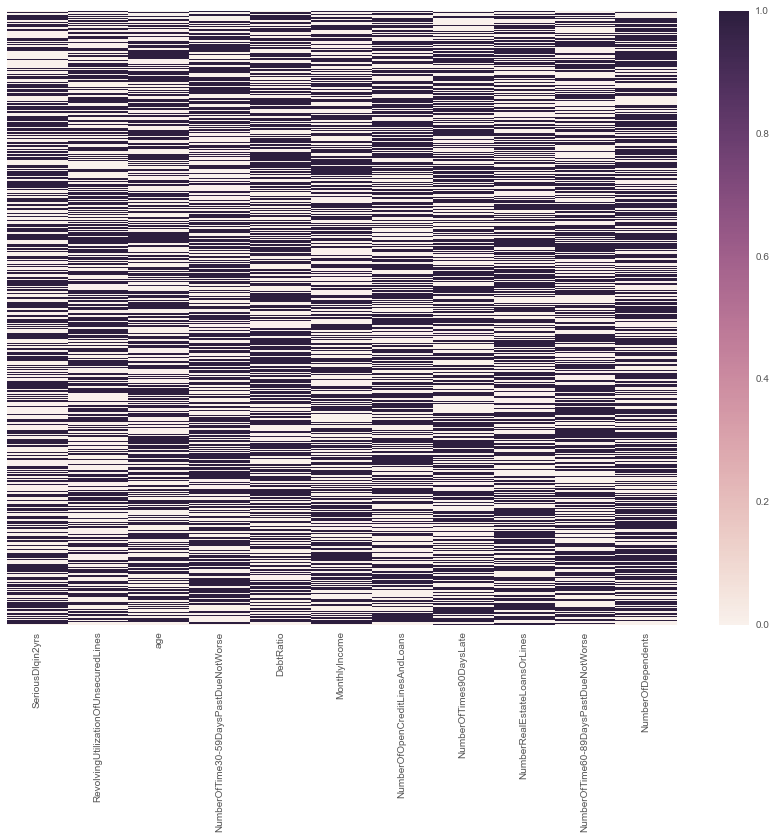

In [263]:
# This is what 11 instances of a MCAR mechanism look like
missing_map(df_simu,nmax=1000)

# Black : missing / White : not missing

In [264]:
#/!\ LEGENDE... 

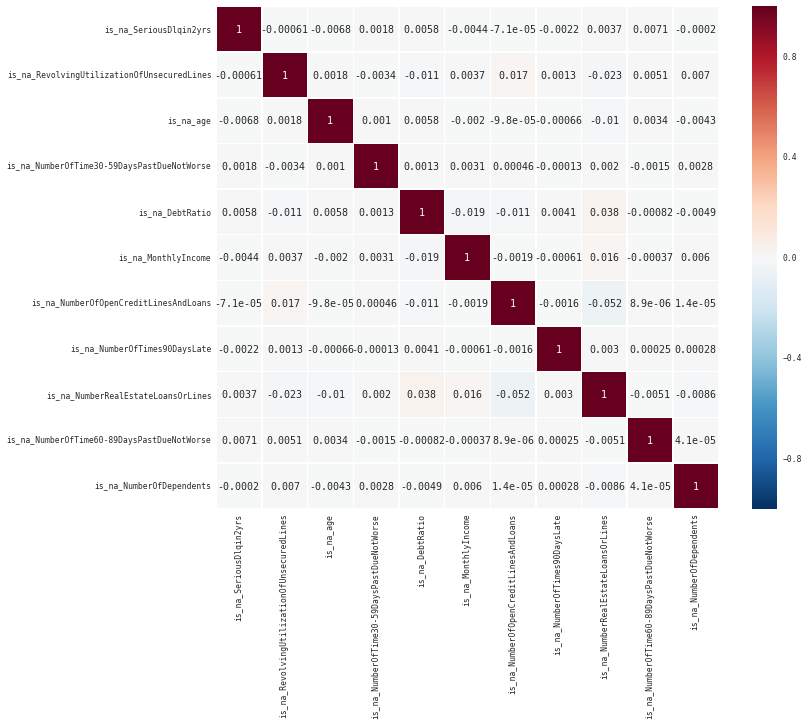

In [267]:
# Are missing values independant ? (Necesary if random)

na = NaImputer(df_simu)
na.corrplot_na() 

### 3) Distribution comparison before/after

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11224a750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d6f6590>]], dtype=object)

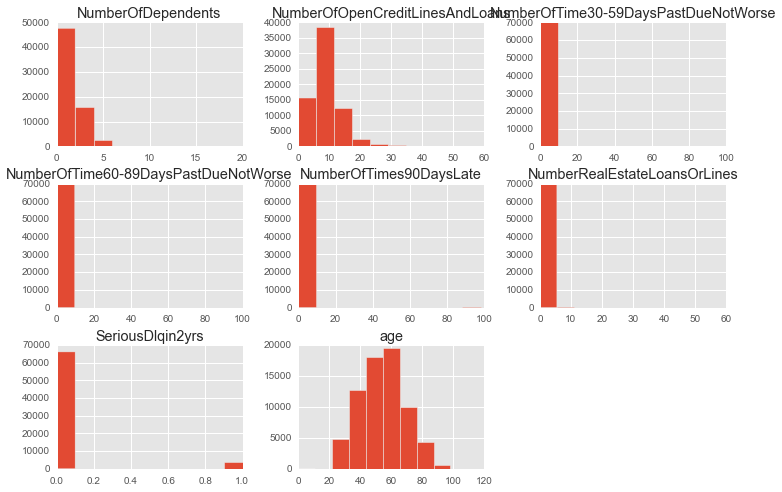

In [247]:
df_simu.hist() # Variables that were true numeric have been changed to categoric and are not plotted
# QUELLE EST LA LOGIQUE ICI ?


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d781bd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11087a390>]], dtype=object)

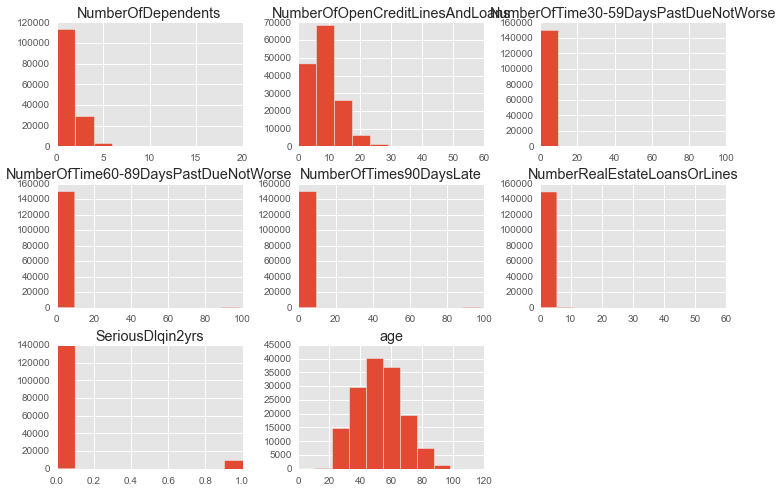

In [249]:
df_train_categoric.hist()

#### Numerical comparison between probability distributions : Jensen-Shannon Divergence (JSD)

In [308]:
df_train.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [256]:
for col in df_simu.columns:
    try : 
        print("JSD between both "+col+" distributions:{}".format(
                jsd_series(df_simu.loc[:,col],df_train_categoric.loc[:,col])))
    except Exception as e:
        print('error:{}'.format(e))
        
# PRESENTER SOUS FORME DE TABLEAU ? HIERARCHISER ??

JSD between both SeriousDlqin2yrs distributions:0.000209832983921
JSD between both RevolvingUtilizationOfUnsecuredLines distributions:0.0551127534624
JSD between both age distributions:0.0169519174239
JSD between both NumberOfTime30-59DaysPastDueNotWorse distributions:0.0033428417195
JSD between both DebtRatio distributions:0.00730041126303
JSD between both MonthlyIncome distributions:0.0109087348296
JSD between both NumberOfOpenCreditLinesAndLoans distributions:0.0156473700033
JSD between both NumberOfTimes90DaysLate distributions:0.000603658519624
JSD between both NumberRealEstateLoansOrLines distributions:0.06534035293
JSD between both NumberOfTime60-89DaysPastDueNotWorse distributions:0.00919190478359
JSD between both NumberOfDependents distributions:0.000866072724621


## III- Prediction using skicit learn 

#### Structure of the data 

In [233]:
ec = DataExploration(df_simu)

In [226]:
ec.structure()

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key
SeriousDlqin2yrs,float64,numeric,50000,0.333333,2,False,False,False
RevolvingUtilizationOfUnsecuredLines,object,factor,50000,0.333333,10,False,False,False
age,float64,numeric,50000,0.333333,86,False,False,False
NumberOfTime30-59DaysPastDueNotWorse,float64,numeric,50000,0.333333,16,False,False,False
DebtRatio,object,factor,50000,0.333333,10,False,False,False
MonthlyIncome,object,character,50000,0.333333,11,False,False,False
NumberOfOpenCreditLinesAndLoans,float64,numeric,50000,0.333333,58,False,False,False
NumberOfTimes90DaysLate,float64,numeric,50000,0.333333,19,False,False,False
NumberRealEstateLoansOrLines,float64,numeric,50000,0.333333,28,False,False,False
NumberOfTime60-89DaysPastDueNotWorse,float64,numeric,50000,0.333333,13,False,False,False


#### Cleaning

In [231]:
# Dirty cleaning 
df_simu.loc[df_simu.NumberOfOpenCreditLinesAndLoans >=10,'NumberOfOpenCreditLinesAndLoans'] =10
df_simu.loc[df_simu.NumberRealEstateLoansOrLines >=5,'NumberRealEstateLoansOrLines'] = 5
df_simu.loc[df_simu.NumberOfTimes90DaysLate >=5,'NumberOfTimes90DaysLate'] = 5
df_simu.loc[df_simu.NumberOfTimes90DaysLate >=5,'NumberOfTimes90DaysLate'] = 5

#### Transformation to discrete variables 

In [243]:

df_simu.age = pd.qcut(df_simu.age,10)

In [244]:
df_simu.age.value_counts()

(32, 39]     11365
(56, 61]     11036
(43, 47]     10684
(61, 66]     10607
[0, 32]      10218
(39, 43]     10133
(47, 51]      9108
(72, 109]     9031
(66, 72]      9009
(51, 56]      8809
dtype: int64

In [245]:
DataExploration(df_simu).structure()

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key
SeriousDlqin2yrs,float64,numeric,50000,0.333333,2,False,False,False
RevolvingUtilizationOfUnsecuredLines,object,factor,50000,0.333333,10,False,False,False
age,category,factor,50000,0.333333,10,False,False,False
NumberOfTime30-59DaysPastDueNotWorse,float64,numeric,50000,0.333333,16,False,False,False
DebtRatio,object,factor,50000,0.333333,10,False,False,False
MonthlyIncome,object,character,50000,0.333333,11,False,False,False
NumberOfOpenCreditLinesAndLoans,float64,numeric,50000,0.333333,11,False,False,False
NumberOfTimes90DaysLate,float64,numeric,50000,0.333333,6,False,False,False
NumberRealEstateLoansOrLines,float64,numeric,50000,0.333333,6,False,False,False
NumberOfTime60-89DaysPastDueNotWorse,float64,numeric,50000,0.333333,13,False,False,False


#### Slkicit learn age imputation

In [271]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
test = pd.get_dummies(df_simu[df_simu.age.isnull()].drop('age',axis =1).fillna('mean')).as_matrix()
X = pd.get_dummies(df_simu[df_simu.age.notnull()].drop('age',axis =1).fillna('mean')).as_matrix()
y = df_simu.age[df_simu.age.notnull()].values
clf.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [275]:
X.shape

(100000, 106)

In [277]:
# train prediction
X.shape
clf.predict(X)

array(['(43, 47]', '[0, 32]', '[0, 32]', ..., '(61, 66]', '(72, 109]',
       '(43, 47]'], 
      dtype='|S9')

In [278]:
clf.predict_proba(X)

array([[  1.83289771e-01,   2.19381391e-01,   2.90085412e-01, ...,
          6.84279563e-04,   6.03975113e-05,   1.66190304e-02],
       [  1.40230809e-01,   5.42521369e-02,   3.86441449e-02, ...,
          3.34233046e-02,   3.84214041e-02,   5.91624745e-01],
       [  9.36480784e-02,   3.93464423e-02,   3.11406469e-02, ...,
          6.04516585e-03,   5.99939570e-03,   7.68079512e-01],
       ..., 
       [  2.64899184e-02,   3.15004954e-02,   4.77347598e-02, ...,
          1.90957938e-01,   8.03141975e-02,   2.86331036e-03],
       [  1.35909450e-01,   9.31697184e-02,   7.90661232e-02, ...,
          1.14578204e-01,   1.71856434e-01,   1.31061988e-01],
       [  1.35726641e-01,   1.68230766e-01,   2.02803346e-01, ...,
          3.70781645e-02,   7.03995712e-03,   1.25880481e-02]])

In [279]:
clf.score(X, y, sample_weight=None)

0.2114

In [282]:
res= np.array([clf.predict(X),y]).T

In [283]:
res

array([['(43, 47]', '(43, 47]'],
       ['[0, 32]', '(39, 43]'],
       ['[0, 32]', '(32, 39]'],
       ..., 
       ['(61, 66]', '(56, 61]'],
       ['(72, 109]', '[0, 32]'],
       ['(43, 47]', '(61, 66]']], dtype=object)

In [273]:
# test prediction
test.shape
#clf.predict(test)

(50000, 103)

In [251]:
y

[(43, 47], (39, 43], (32, 39], [0, 32], (56, 61], ..., [0, 32], (43, 47], (56, 61], [0, 32], (61, 66]]
Length: 100000
Categories (10, object): [[0, 32] < (32, 39] < (39, 43] < (43, 47] ... (56, 61] < (61, 66] < (66, 72] < (72, 109]]

In [ ]:
df_simu.drop('age',axis =1)

In [ ]:
df_simu.age.isnull()